# Iris Species

In [147]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("deep", 8)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

In [148]:
# load data
iris = pd.read_csv('./data/Iris.csv',index_col='Id')

In [149]:
# describe data
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [150]:
# info
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [151]:
# describe
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [152]:
# data
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
# distribution
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

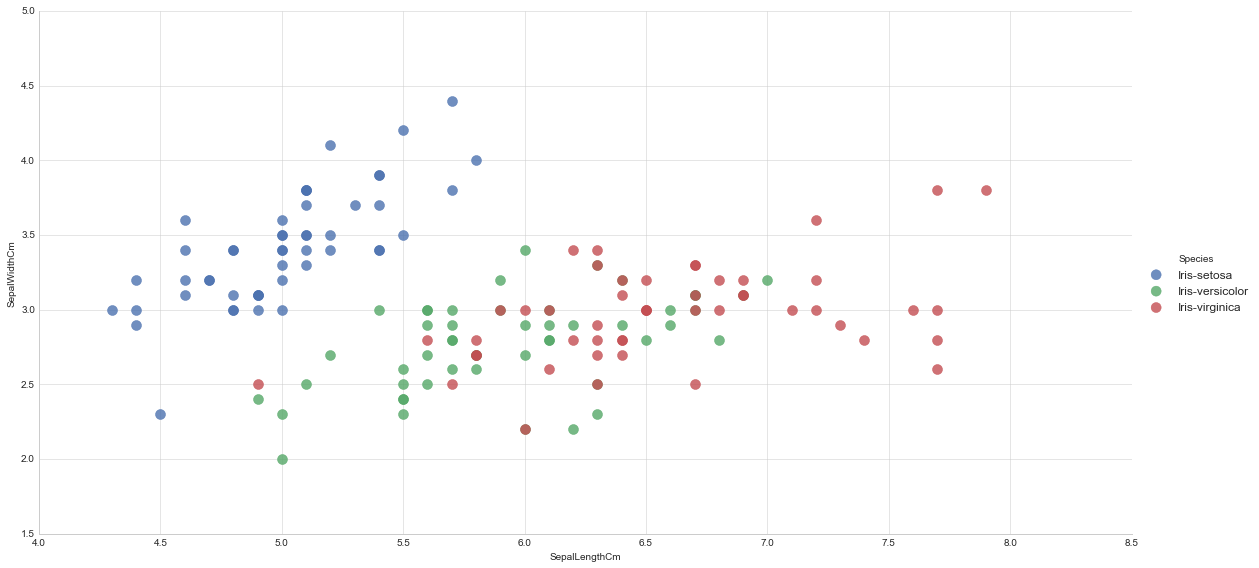

In [154]:
# plot distribution based on sepal
sns.lmplot( x="SepalLengthCm", y="SepalWidthCm", data=iris,
           fit_reg=False, hue='Species', legend=True,size=8, aspect=2,
          scatter_kws={"s": 100});

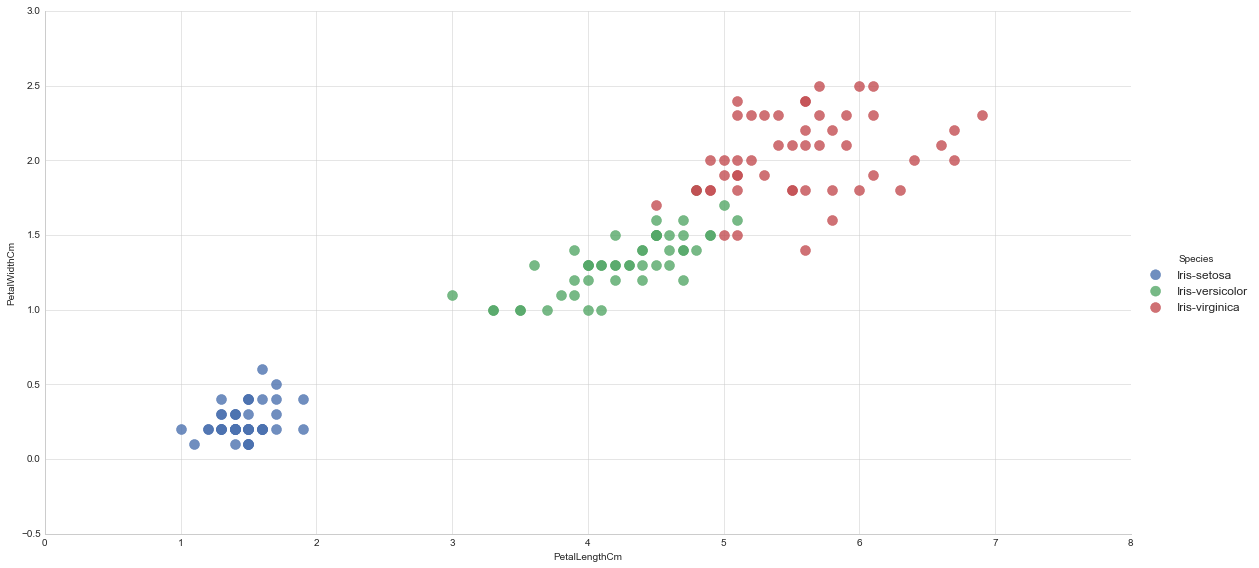

In [155]:
# plot distribution based on sepal
sns.lmplot( x="PetalLengthCm", y="PetalWidthCm", data=iris,
           fit_reg=False, hue='Species', legend=True,size=8, aspect=2,
          scatter_kws={"s": 100});

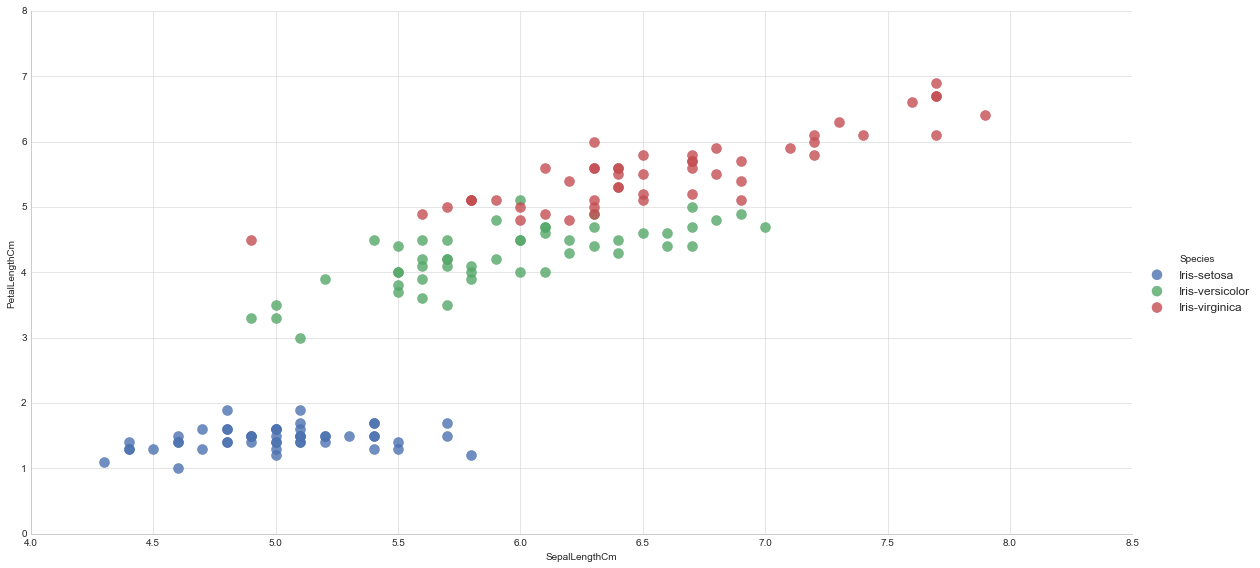

In [156]:
# plot distribution based on length
sns.lmplot( x="SepalLengthCm", y="PetalLengthCm", data=iris,
           fit_reg=False, hue='Species', legend=True,size=8, aspect=2,
          scatter_kws={"s": 100});

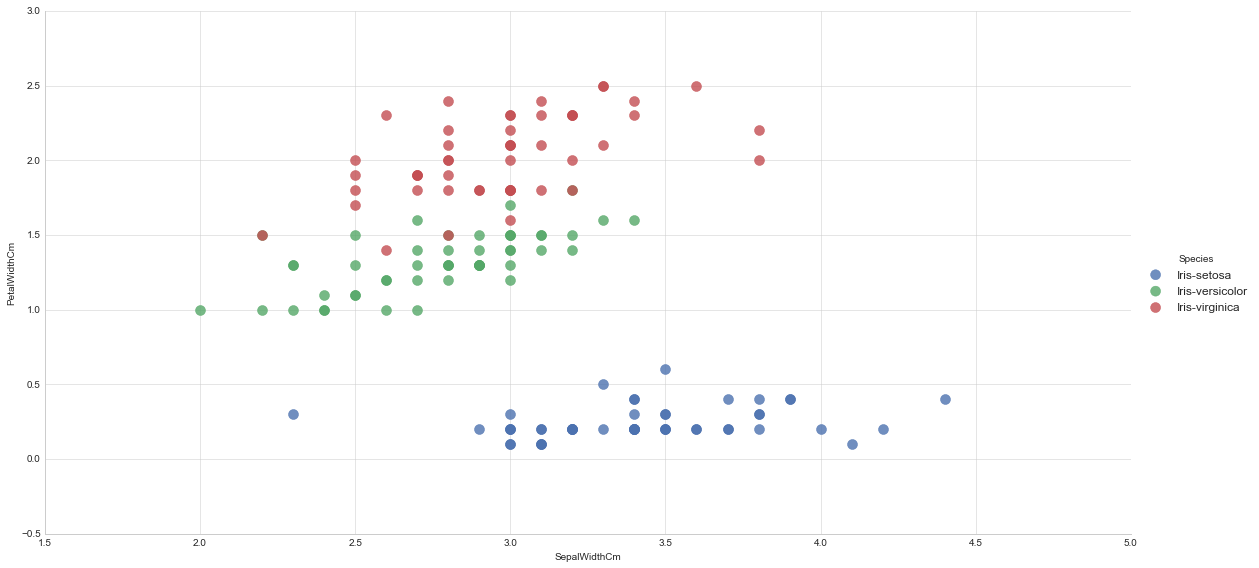

In [157]:
# plot distribution based on width
sns.lmplot( x="SepalWidthCm", y="PetalWidthCm", data=iris,
           fit_reg=False, hue='Species', legend=True,size=8, aspect=2,
          scatter_kws={"s": 100});

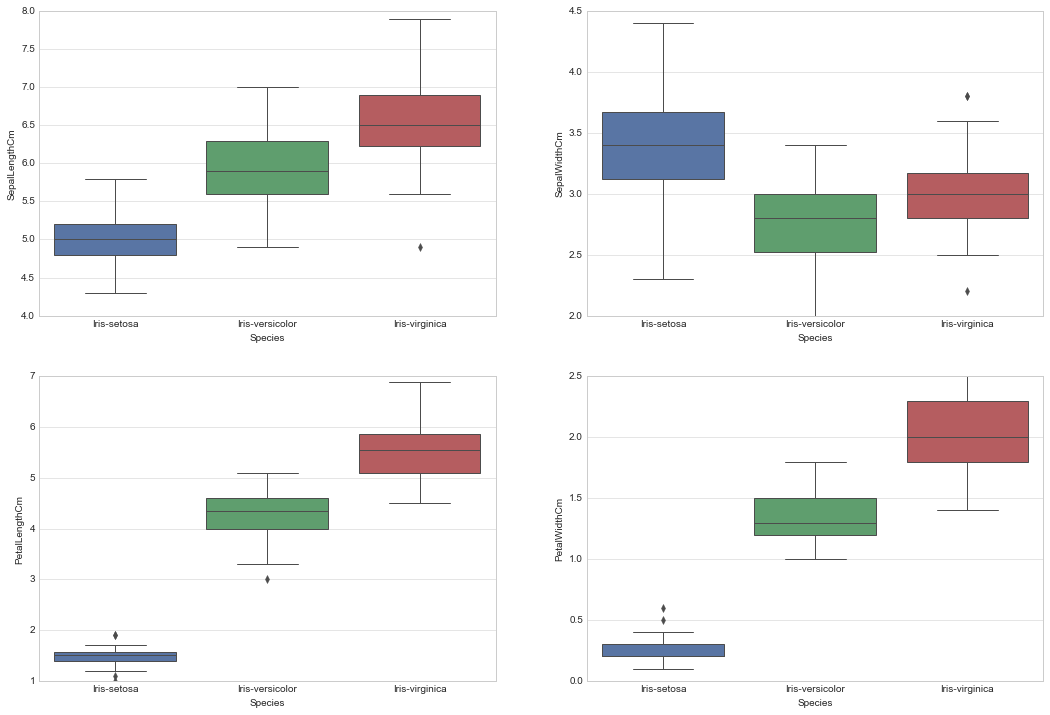

In [158]:
# feature distribution
f, axes = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(x='Species',y='SepalLengthCm',data=iris, ax=axes[0][0])
sns.boxplot(x='Species',y='SepalWidthCm',data=iris, ax=axes[0][1])
sns.boxplot(x='Species',y='PetalLengthCm',data=iris, ax=axes[1][0])
sns.boxplot(x='Species',y='PetalWidthCm',data=iris, ax=axes[1][1]);

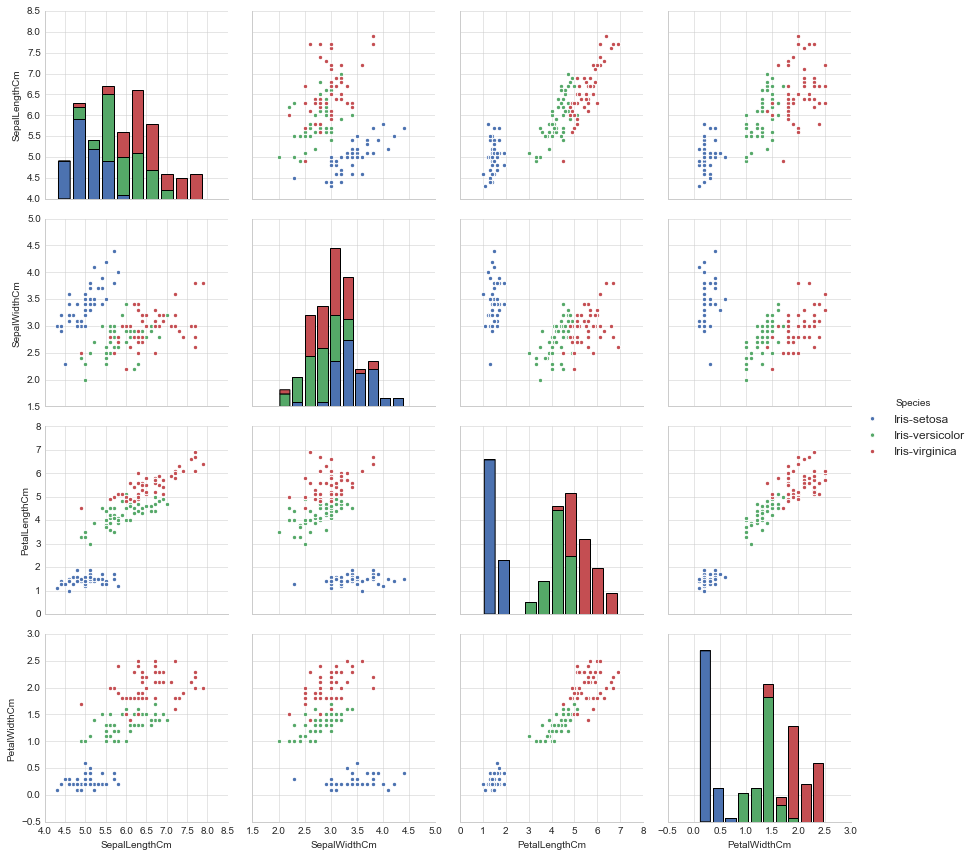

In [159]:
sns.pairplot(iris, hue="Species", size=3)

In [160]:
# split data
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# encode the target variable
mapping = {'Iris-virginica':0,'Iris-setosa':1,'Iris-versicolor':2}
y = y.replace(mapping)

# train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y)

In [161]:
# prep data
sc = StandardScaler()
sc.fit(X_train)

# transform data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [162]:
# tool
def plot_decision_boundaries(X, y, classifier, res=0.1):
    # 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,res),
                          np.arange(x2_min,x2_max,res))
    
    # prediction
    inputs = np.array([xx1.ravel(),xx2.ravel()]).T
    preds = convert_pred(classifier.predict(inputs).reshape(xx1.shape))
    
    # plot
    fig, ax = plt.subplots(figsize=(15,8))
    plt.contourf(xx1, xx2, preds, alpha=0.4, cmap=cmap)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    # plot data poitns
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

**Models**
1. KNN
2. SVC
3. Naive-Bayes
4. Decision Tree Classifier
5. Logistic Reggression
6. Random Forests
7. xgb

In [163]:
# KNN+Grid
tunes = {'n_neighbors':list(range(1,20))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=tunes, cv=5, scoring='accuracy')

In [164]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

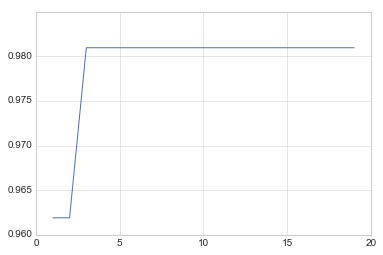

In [165]:
# plot accuracyes
grid_mean = [x.mean_validation_score for x in grid.grid_scores_]
plt.plot(tunes['n_neighbors'],grid_mean);

In [166]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[13  0  2]
 [ 0 15  0]
 [ 1  0 14]]


             precision    recall  f1-score   support

          0       0.93      0.87      0.90        15
          1       1.00      1.00      1.00        15
          2       0.88      0.93      0.90        15

avg / total       0.93      0.93      0.93        45



Accuracy score is:  0.9333333333333333


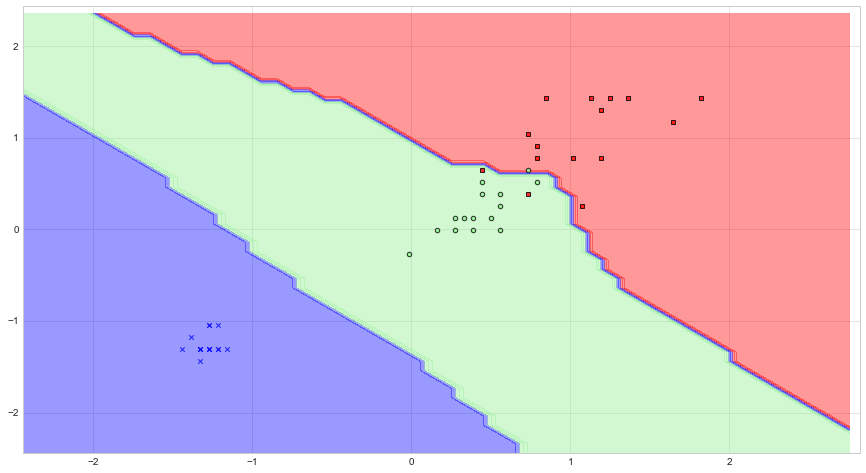

In [167]:
plot_decision_boundaries(X_test_sc, y_test, grid);

In [168]:
# SVC+Grid
tunes = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
         'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

svc = SVC()
grid = GridSearchCV(svc, param_grid=tunes, cv=5, scoring='accuracy')

In [169]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [170]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [171]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[13  0  2]
 [ 0 15  0]
 [ 2  0 13]]


             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       1.00      1.00      1.00        15
          2       0.87      0.87      0.87        15

avg / total       0.91      0.91      0.91        45



Accuracy score is:  0.9111111111111111


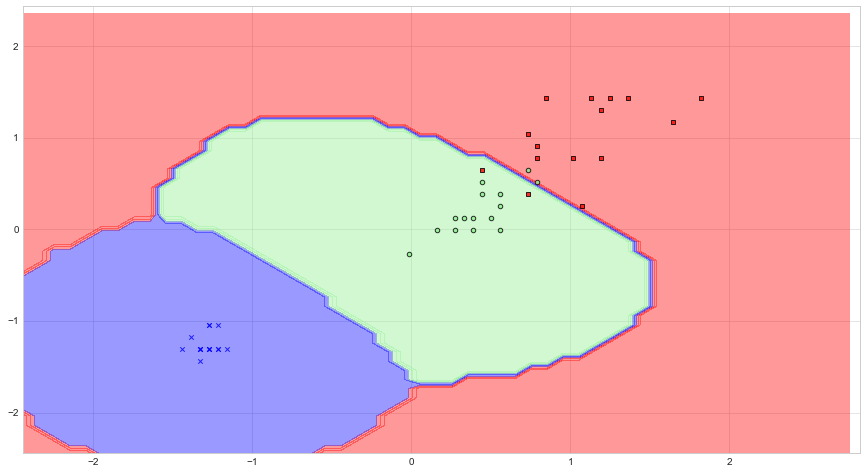

In [172]:
plot_decision_boundaries(X_test_sc, y_test, grid);

In [173]:
# GaussianNB+Grid
gnb = GaussianNB()

In [174]:
# train model
gnb.fit(X_train_sc,y_train)

GaussianNB(priors=None)

In [175]:
print(confusion_matrix(y_test, gnb.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, gnb.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, gnb.predict(X_test_sc)))

[[13  0  2]
 [ 0 15  0]
 [ 2  0 13]]


             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       1.00      1.00      1.00        15
          2       0.87      0.87      0.87        15

avg / total       0.91      0.91      0.91        45



Accuracy score is:  0.9111111111111111


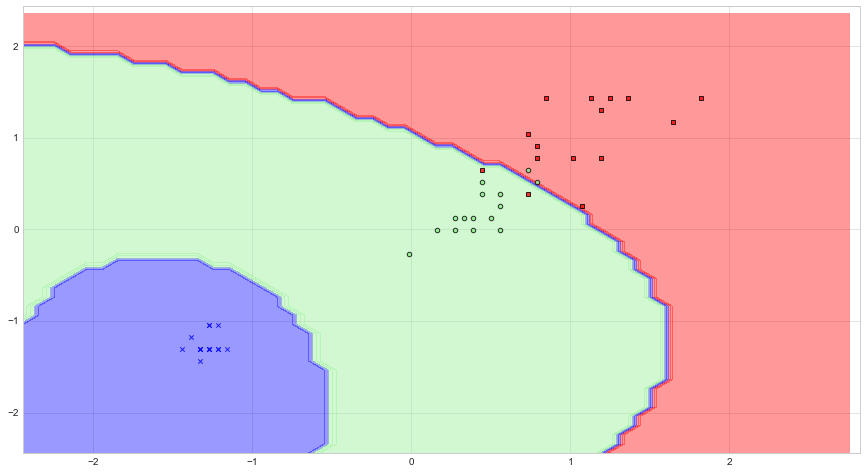

In [176]:
plot_decision_boundaries(X_test_sc, y_test, gnb);

In [177]:
# SVC+Grid
tunes = {'max_depth':[2,3,4,5,6,7,8,9,10,15,20],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5],
         'max_features':['auto','sqrt','log2',None]}

tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, param_grid=tunes, cv=5, scoring='accuracy')

In [178]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': ['auto', 'sqrt', 'log2', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [179]:
grid.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [180]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[14  0  1]
 [ 0 15  0]
 [ 2  0 13]]


             precision    recall  f1-score   support

          0       0.88      0.93      0.90        15
          1       1.00      1.00      1.00        15
          2       0.93      0.87      0.90        15

avg / total       0.93      0.93      0.93        45



Accuracy score is:  0.9333333333333333


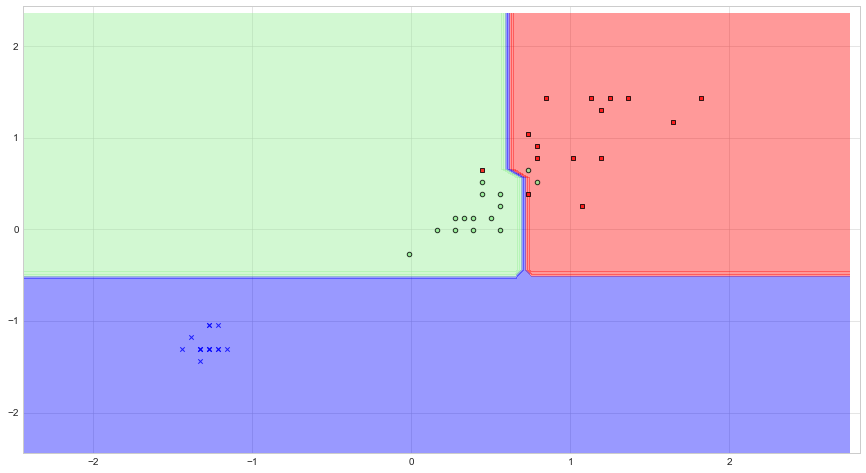

In [181]:
plot_decision_boundaries(X_test_sc, y_test, grid);

In [189]:
# LR+Grid
tunes = {'penalty':['l1','l2'],'C':10**np.linspace(-5,0,20)}

lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid=tunes, cv=5, scoring='accuracy')

In [190]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-05, 1.83298e-05, 3.35982e-05, 6.15848e-05, 1.12884e-04,
       2.06914e-04, 3.79269e-04, 6.95193e-04, 1.27427e-03, 2.33572e-03,
       4.28133e-03, 7.84760e-03, 1.43845e-02, 2.63665e-02, 4.83293e-02,
       8.85867e-02, 1.62378e-01, 2.97635e-01, 5.45559e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [191]:
grid.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [192]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[13  0  2]
 [ 0 15  0]
 [ 3  0 12]]


             precision    recall  f1-score   support

          0       0.81      0.87      0.84        15
          1       1.00      1.00      1.00        15
          2       0.86      0.80      0.83        15

avg / total       0.89      0.89      0.89        45



Accuracy score is:  0.8888888888888888


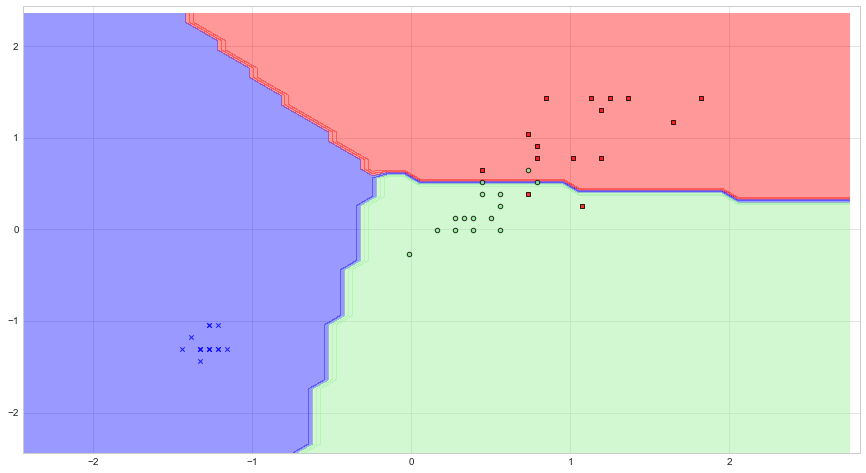

In [193]:
plot_decision_boundaries(X_test_sc, y_test, grid);

In [202]:
# RDF+Grid
tunes = {'n_estimators':[10,50,100,200,500],'max_features':['auto','sqrt','log2',None],
         'max_depth':[3,5,8,10,12,15,20]}

rdf = RandomForestClassifier()
grid = GridSearchCV(rdf, param_grid=tunes, cv=5, scoring='accuracy')

In [203]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200, 500], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [3, 5, 8, 10, 12, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [204]:
grid.best_params_

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}

In [205]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[13  0  2]
 [ 0 15  0]
 [ 2  0 13]]


             precision    recall  f1-score   support

          0       0.87      0.87      0.87        15
          1       1.00      1.00      1.00        15
          2       0.87      0.87      0.87        15

avg / total       0.91      0.91      0.91        45



Accuracy score is:  0.9111111111111111


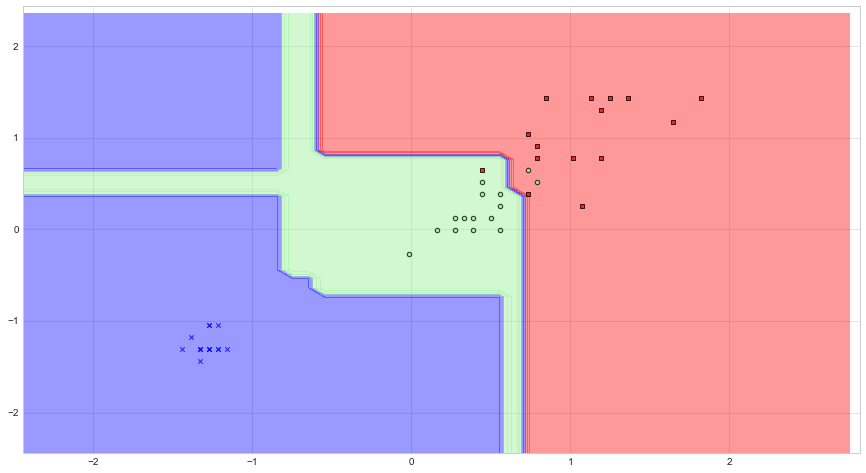

In [206]:
plot_decision_boundaries(X_test_sc, y_test, grid);

In [213]:
# XGB+Grid
tunes = {'max_depth': [3,4,5,6,7],'subsample': [0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'colsample_bytree':[0.5,0.6,0.7,0.8],'n_estimators':[100,200,300],
         'reg_alpha':[0.01, 0.02, 0.03, 0.04]}

boost = xgb.XGBClassifier()
grid = GridSearchCV(boost, param_grid=tunes, cv=5, scoring='accuracy')

In [209]:
# run grid search
grid.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9], 'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8], 'n_estimators': [1000, 2000, 3000], 'reg_alpha': [0.01, 0.02, 0.03, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [210]:
grid.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 3,
 'n_estimators': 1000,
 'reg_alpha': 0.01,
 'subsample': 0.4}

In [211]:
print(confusion_matrix(y_test, grid.predict(X_test_sc)))
print('\n')
print(classification_report(y_test, grid.predict(X_test_sc)))
print('\n')
print('Accuracy score is: ', accuracy_score(y_test, grid.predict(X_test_sc)))

[[14  0  1]
 [ 0 15  0]
 [ 2  0 13]]


             precision    recall  f1-score   support

          0       0.88      0.93      0.90        15
          1       1.00      1.00      1.00        15
          2       0.93      0.87      0.90        15

avg / total       0.93      0.93      0.93        45



Accuracy score is:  0.9333333333333333


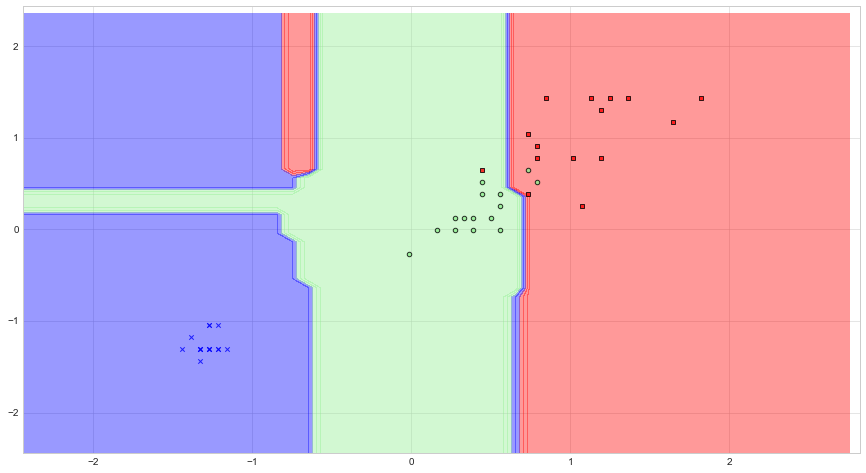

In [212]:
plot_decision_boundaries(X_test_sc, y_test, grid);